
# Agrihub.AI
Help farmer using soil fertilizer and water effectivly, and aware of their soil health.


## Check if it's using GPU


In [578]:
import tensorflow as tf

device_list = tf.test.gpu_device_name()

if device_list != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_list))

Found GPU at: /device:GPU:0


## Data Pre-Processing

In [579]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [580]:
# Load the data
path = '/content/drive/MyDrive/BANGKIT 2023/dataset_01.csv'
df = pd.read_csv(path)
df

,N,P,K,resistivitas,suhu,kelembapan,kesehatan_day,urea_bulk,TSP_bulk,KCL_bulk,urea_mat,TSP_mat,KCL_mat
0,378,10,123,81,19,71,0,0.000000,71.739130,118.333333,0.0,67.391304,98.333333
1,346,10,141,106,20,81,0,0.000000,71.739130,88.333333,0.0,67.391304,68.333333
2,212,7,192,143,18,93,0,0.000000,78.260870,3.333333,0.0,73.913043,0.000000
3,202,7,134,75,20,82,0,0.000000,78.260870,100.000000,0.0,73.913043,80.000000
4,373,13,60,126,18,87,0,0.000000,65.217391,223.333333,0.0,60.869565,203.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,125,15,126,21,33,44,0,2.173913,60.869565,113.333333,0.0,56.521739,93.333333
1996,239,23,227,71,27,54,0,0.000000,43.478261,0.000000,0.0,39.130435,0.000000
1997,124,7,172,31,27,68,1,4.347826,78.260870,36.666667,0.0,73.913043,16.666667
1998,283,27,139,78,31,70,0,0.000000,34.782609,91.666667,0.0,30.434783,71.666667


In [581]:
# Separate the feature and targets into X and y
X = df.iloc[:, :-7]
y = df.iloc[:, -7:]

# Print the shape of Features (X) and targets (y)
print('X shape:', X.shape)
print('y shape:', y.shape)

# Convert X and y into NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

X shape: (2000, 6)
y shape: (2000, 7)


In [582]:
# Normalize X and y
X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
y_normalized = (y - np.min(y, axis=0)) / (np.max(y, axis=0) - np.min(y, axis=0))

# Define function to split data into training and validation sets
def train_val_split(X, y, val_ratio, random_seed):

  # Implelmenting random seed
  np.random.seed(random_seed)
  indices = np.random.permutation(len(X))

  # Assign the validation size
  val_size = int(val_ratio * len(X))

  # Assign the indices for Training and Validation
  train_indices = indices[val_size:]
  val_indices = indices[:val_size]

  # Split into X and y
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  return X_train, X_val, y_train, y_val

# Implement and assign the function above into variables
X_train, X_val, y_train, y_val = train_val_split(X_normalized, y_normalized, 0.2, 33)

## Building Model Architecture & Evaluation


In [583]:
import tensorflow.keras.callbacks as callbacks

# Define the callback function
class StopTrainingCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('mean_absolute_error') < 0.06:
            print("\nMean Absolute Error reached below 0.4. Stopping training.")
            self.model.stop_training = True

# Create an instance of the callback
stop_callback = StopTrainingCallback()

In [584]:
#Import libraries
import tensorflow as tf
from tensorflow.keras import layers

In [585]:
# DeepLearning Neural Network (DNN)

# Architecture
input_shape = (6, )

model = tf.keras.models.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = input_shape),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(7, activation = 'relu')
])

# Compile the model 
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics =  ['mean_absolute_error']

)

In [586]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_297 (Dense)           (None, 64)                448       
                                                                 
 dense_298 (Dense)           (None, 32)                2080      
                                                                 
 dense_299 (Dense)           (None, 7)                 231       
                                                                 
Total params: 2,759
Trainable params: 2,759
Non-trainable params: 0
_________________________________________________________________


In [587]:
# Train the model
# callbacks=[stop_callback]
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 100,
                    validation_data = (X_val, y_val)
                    )

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.2131 - val_loss: 0.0654 - val_mean_absolute_error: 0.1724
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0582 - mean_absolute_error: 0.1570 - val_loss: 0.0526 - val_mean_absolute_error: 0.1369
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0484 - mean_absolute_error: 0.1295 - val_loss: 0.0469 - val_mean_absolute_error: 0.1179
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0437 - mean_absolute_error: 0.1143 - val_loss: 0.0450 - val_mean_absolute_error: 0.1214
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0402 - mean_absolute_error: 0.1091 - val_loss: 0.0402 - val_mean_absolute_error: 0.1021
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0379 - mean_absolute_error: 0.1012 - val_loss: 0.0391 - val_mean_absolute_error: 0.1010
Epoch 7/100
50/50 [===

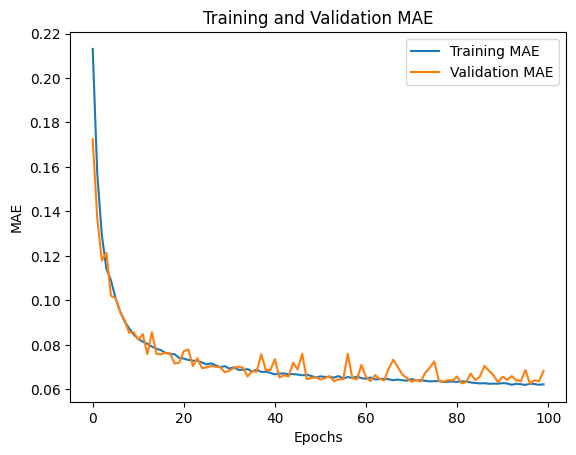

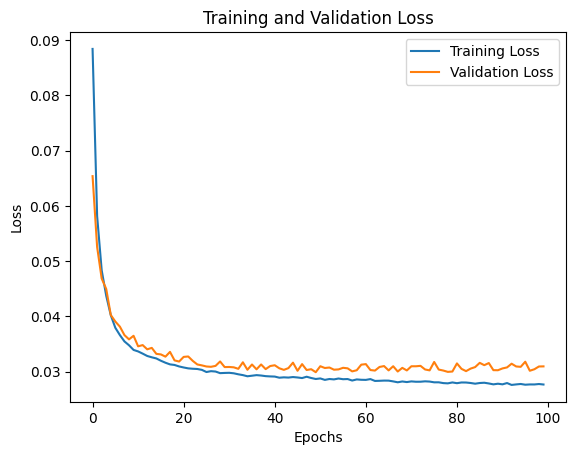

In [588]:
# Access the MAE and loss values from the history object
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot MAE
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Fine Tune The Model
adjust the model archivetcture, hyperparameter, and training process to improve the
performance

### DNN Using Adam Optimizer

In [589]:
# DNN Using Adam Optimizer

# Architecture
input_shape = (6, )

model = tf.keras.models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = input_shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(7, activation = 'relu')
])

# Compile the model 
optimizer = 'adam'

model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics =  ['mean_absolute_error']

)

model.summary()

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 100,
                    validation_data = (X_val, y_val)
                    )

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 128)               896       
                                                                 
 dense_301 (Dense)           (None, 64)                8256      
                                                                 
 dense_302 (Dense)           (None, 32)                2080      
                                                                 
 dense_303 (Dense)           (None, 16)                528       
                                                                 
 dense_304 (Dense)           (None, 7)                 119       
                                                                 
Total params: 11,879
Trainable params: 11,879
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================

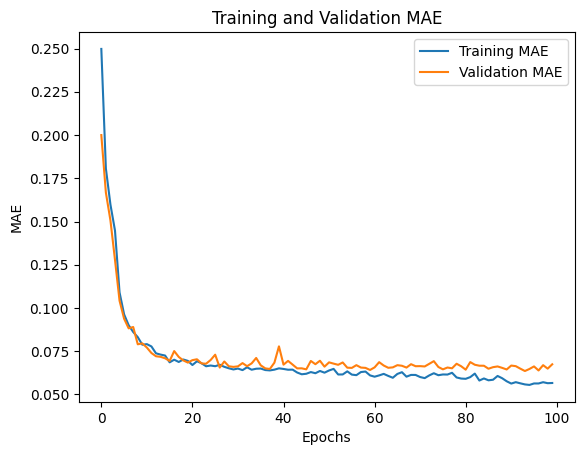

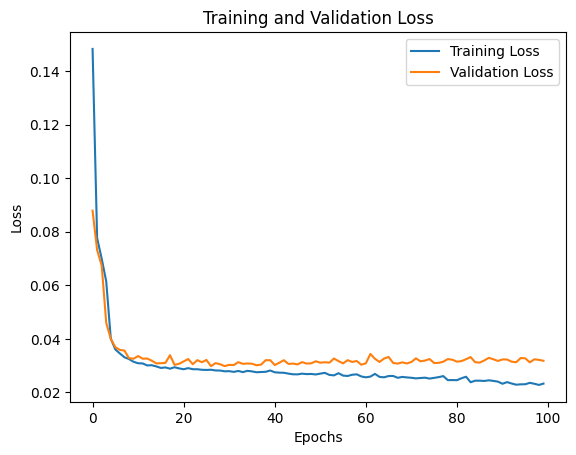

In [590]:
# Access the MAE and loss values from the history object
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot MAE
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Normalize New Data and Make Prediction

In [591]:
def recommendation( N, P, K, resistivity, temperature, humidity):

    # Make a new data called X_new
    X_new = np.array( [[ N, P, K, resistivity, temperature, humidity]] )

    # Normalize the new data using the same normalization parameter as the training data
    X_new_normalized = (X_new - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    # Perform predictions on the normalized test data
    y_pred_normalized = model.predict( X_new_normalized )

    # Denormalize the predicted values to obtain the actual predicted values
    y_pred = y_pred_normalized * (np.max(y, axis = 0) - np.min(y, axis = 0)) + np.min(y, axis=0)

    # Round the prediction
    rounded_predictions = np.round(y_pred, 2)

    # Separate and label the variables
    r_kesehatan = rounded_predictions[0, 0]
    r_urea_bulk = rounded_predictions[0, 1]
    r_TSP_bulk = rounded_predictions[0, 2]
    r_KCL_bulk = rounded_predictions[0, 3]
    r_urea_mat = rounded_predictions[0, 4]
    r_TSP_mat = rounded_predictions[0, 5]
    r_KCL_mat = rounded_predictions[0, 6]
    
    return r_kesehatan, r_urea_bulk, r_TSP_bulk, r_KCL_bulk, r_urea_mat, r_TSP_mat, r_KCL_mat

In [592]:
recommendation(378,	10,	123,	81,	19,	71)

1/1 [==============================] - 0s 96ms/step


(0.32, 0.0, 70.02, 104.85, 0.0, 65.33, 86.04)

## Save the model and Convert to preferred formats

In [593]:
# Save the model in .h5 Formate

model.save('/content/drive/MyDrive/BANGKIT 2023/saved_model/model.h5')

In [594]:
# Save the model into Tflite format

import tensorflow as tf
import pathlib

# Load your model
model = tf.keras.models.load_model('/content/drive/MyDrive/BANGKIT 2023/saved_model/model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/content/drive/MyDrive/BANGKIT 2023/saved_model1/model.tflite')
tflite_model_file.write_bytes(tflite_model)

50324

In [595]:
# # Convert into TensorFlow.js format

# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model,
# '/content/drive/MyDrive/BANGKIT 2023/Saved Model')